# Drawing rectangle and semicircle

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

from operator import le
from re import L
from anyio import current_default_worker_thread_limiter
from matplotlib.pyplot import legend
import numpy as np
import matplotlib.pylab as plt
from sympy import rad

In [41]:
# Define variables
sheet_dimension = 3000

length_a = 1000
length_b = 1500
radius = 100

coeff = 0.1

timesteps = np.linspace(0,100, num = 150)

In [42]:
def background(sheet_dimension):
    back = np.zeros((sheet_dimension,sheet_dimension))
    return back

def inner_rectange(length_a, length_b, radius):
    new_a = length_a - 2*radius
    new_b = length_b - 2*radius

    rectangle = np.ones((new_a,new_b))
    return rectangle

def outer_vertical_rect(length_a,radius):
    new_a = length_a - 2*radius
    rectangle = np.ones((new_a,radius))
    return(rectangle)

In [43]:
def outer_orizontal_rect(length_b,radius):
    new_b = length_b - 2*radius
    rectangle = np.ones((radius,new_b))
    return(rectangle)


def circle(radius):
    x = np.linspace(-radius,radius, num = 2*radius)
    y = np.linspace(-radius,radius, num = 2*radius)
    A = np.zeros((2*radius,2*radius))

    for i in x:
        for j in y:
            if np.sqrt(i**2+j**2) < radius:
                A[radius+int(i),radius+int(j)] = 1
    figure = A
    return A

In [44]:
def apply_central_rectagle(background, rectangle):
    N = np.size(background[:,0])
    x = np.size(rectangle[:,0])
    y = np.size(rectangle[0,:])

    if N % 2 != 0:
        N = N+1
    if y % 2 != 0:
        y = y+1
    if x % 2 != 0:
        x = x+1

    background[int((N/2)-(x/2)):int((N/2)+(x/2)),int((N/2)-(y/2)):int((N/2)+(y/2))] = rectangle
    figure = background
    return figure

In [45]:
def apply_lateral_rectangles(background, orizontal, vertical):
    N = np.size(background[:,0])
    x = np.size(orizontal[0,:])
    y = np.size(vertical[:,0])
    r = np.size(orizontal[:,0])

    if N % 2 != 0:
        N = N+1
    if y % 2 != 0:
        y = y+1
    if x % 2 != 0:
        x = x+1
    if r % 2 != 0:
        r = r+1

    background[int(N/2-y/2):int(N/2+y/2),int(N/2-x/2-r):int(N/2-x/2)] = vertical
    background[int(N/2-y/2):int(N/2+y/2),int(N/2+x/2):int(N/2+x/2+r)] = vertical

    background[int(N/2-y/2-r):int(N/2-y/2),int(N/2-x/2):int(N/2+x/2)] = orizontal
    background[int(N/2+y/2):int(N/2+y/2+r),int(N/2-x/2):int(N/2+x/2)] = orizontal

    figure = background
    return figure

In [46]:
def apply_edges_circes(circle, background, rectangle):
    N = np.size(background[:,0])
    x = np.size(rectangle[:,0])
    y = np.size(rectangle[0,:])
    r = np.size(circle[:,0])/2

    if N % 2 != 0:
        N = N+1
    if y % 2 != 0:
        y = y+1
    if x % 2 != 0:
        x = x+1

    k = [-1,1]
    for i in k:
        for j in k:
            background[int(N/2+i*(x/2)-r):int(N/2+i*(x/2)+r),int(N/2+j*(y/2)-r):int(N/2+j*(y/2)+r)] = circle
        

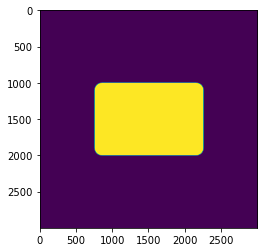

In [47]:


back = background(sheet_dimension)
central_rect = coeff*inner_rectange(length_a,length_b,radius)
orizontal = coeff*outer_orizontal_rect(length_b,radius)
vertical = coeff*outer_vertical_rect(length_a,radius)
cir = coeff*circle(radius)

picture = apply_edges_circes(cir, back, central_rect)
picture = apply_central_rectagle(back,central_rect)
picture = apply_lateral_rectangles(back,orizontal,vertical)



figure, axes = plt.subplots()

axes.imshow(picture)

plt.show()